In [84]:
import re                                  # library for regular expression operations
import string                              # for string operations
import nltk                                # Python library for NLP
# from nltk.corpus import stopwords          # module for stop words that come with NLTK
# from nltk.stem import PorterStemmer        # module for stemming
# from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [85]:
df=pd.read_csv('train.csv',encoding = "ISO-8859-1")

In [86]:
df.isnull().any()

ItemID           False
Sentiment        False
SentimentText    False
dtype: bool

<Axes: >

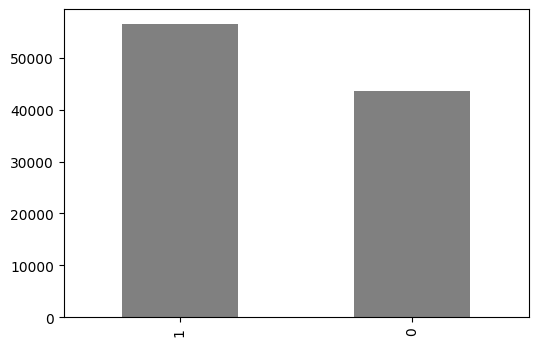

In [87]:
# checking the distribution of tweets in the data
df['Sentiment'].value_counts().plot.bar(color = 'grey', figsize = (6, 4))

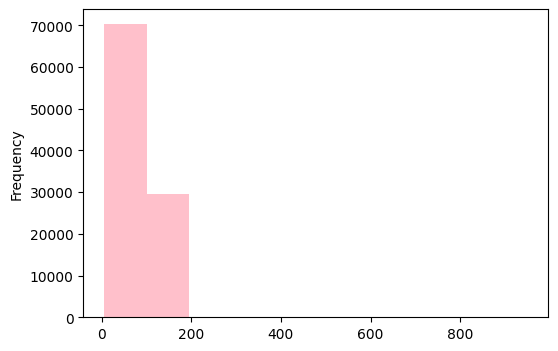

In [88]:
length_df =df['SentimentText'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

In [89]:
positive_tweets =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 1]])
negative_tweets =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 0]])

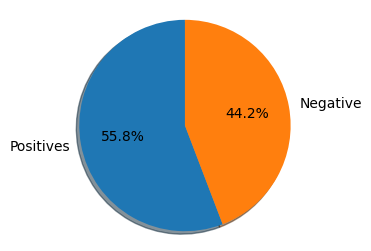

In [90]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(3, 3))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(positive_tweets), len(negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [91]:
# adding a column to represent the length of the tweet

df['len'] = df['SentimentText'].str.len()

df.head(10)

,ItemID,Sentiment,SentimentText,len
0,1,0,is so sad for my APL frie...,61
1,2,0,I missed the New Moon trail...,51
2,3,1,omg its already 7:30 :O,37
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,132
4,5,0,i think mi bf is cheating on me!!! ...,53
5,6,0,or i just worry too much?,42
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,41
7,8,0,Sunny Again Work Tomorrow :-| ...,61
8,9,1,handed in my uniform today . i miss you ...,53
9,10,1,hmmmm.... i wonder how she my number @-),46


<ipython-input-92-1cbfd0d35672>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('len').mean()['Sentiment'].plot.hist(color = 'black', figsize = (6, 4),)


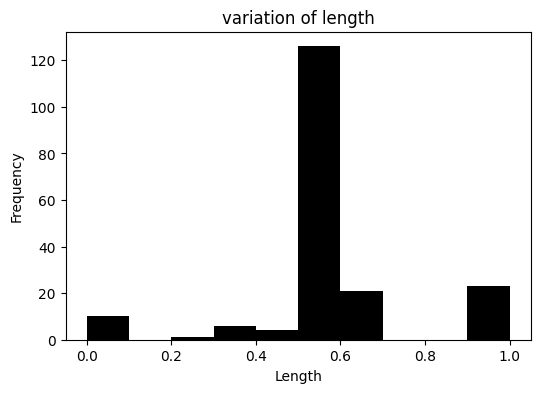

In [92]:
df.groupby('len').mean()['Sentiment'].plot.hist(color = 'black', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

In [93]:
df.groupby('Sentiment').describe()

ItemID                                                      \
             count          mean           std  min       25%      50%   
Sentiment                                                                
0          43532.0  47383.876413  29754.229279  1.0  20397.75  46716.0   
1          56457.0  52026.250775  27994.983763  3.0  28281.00  52305.0   

                                  len                                         \
               75%       max    count       mean        std  min   25%   50%   
Sentiment                                                                      
0          73366.0   99998.0  43532.0  78.445259  36.959457  6.0  48.0  75.0   
1          76096.0  100000.0  56457.0  76.353721  35.905370  7.0  46.0  72.0   

                         
             75%    max  
Sentiment                
0          110.0  949.0  
1          106.0  274.0

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

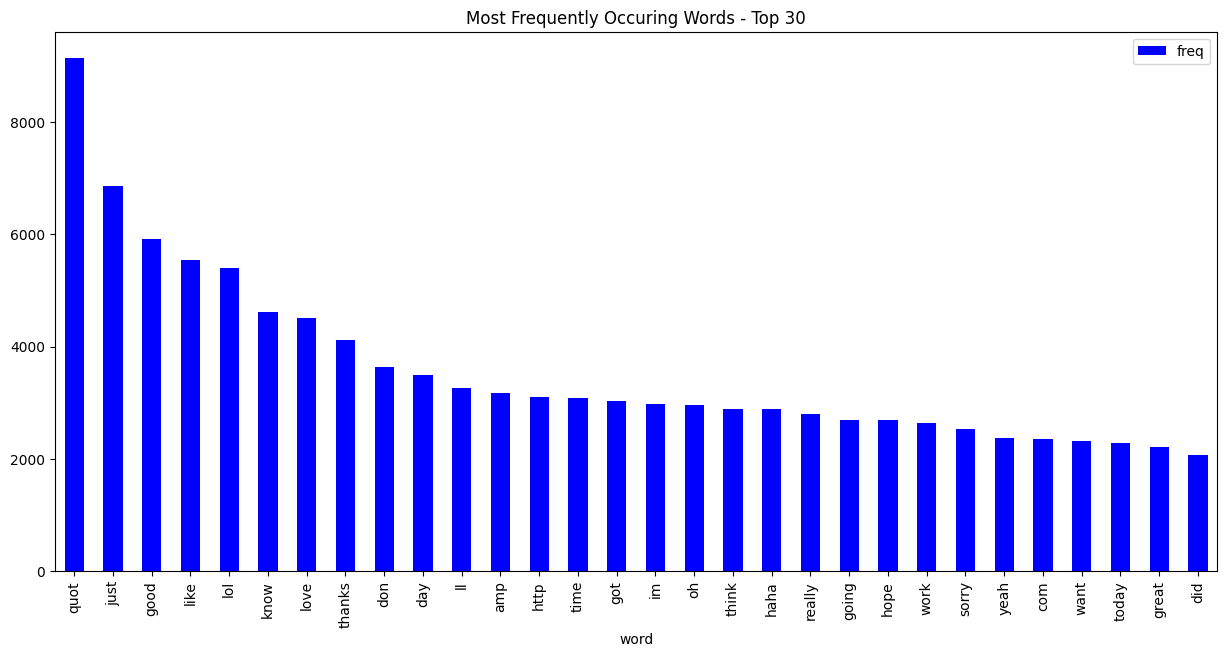

In [94]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.SentimentText)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

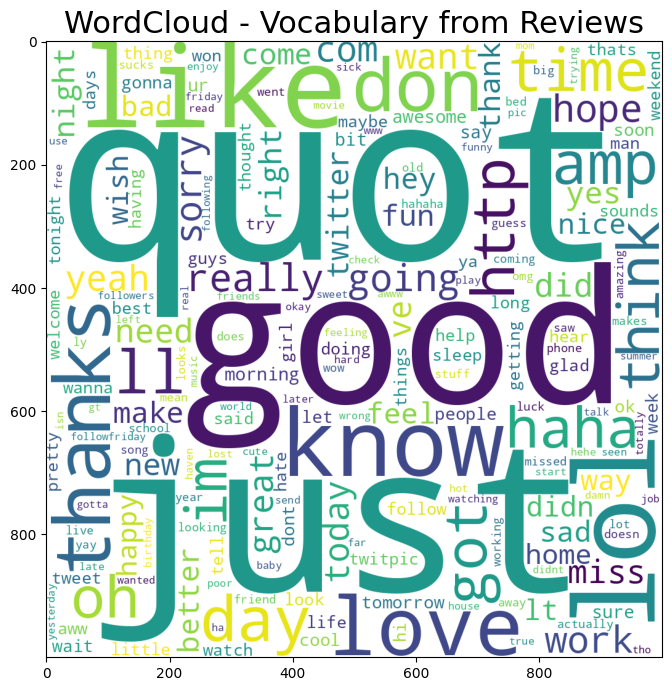

In [95]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

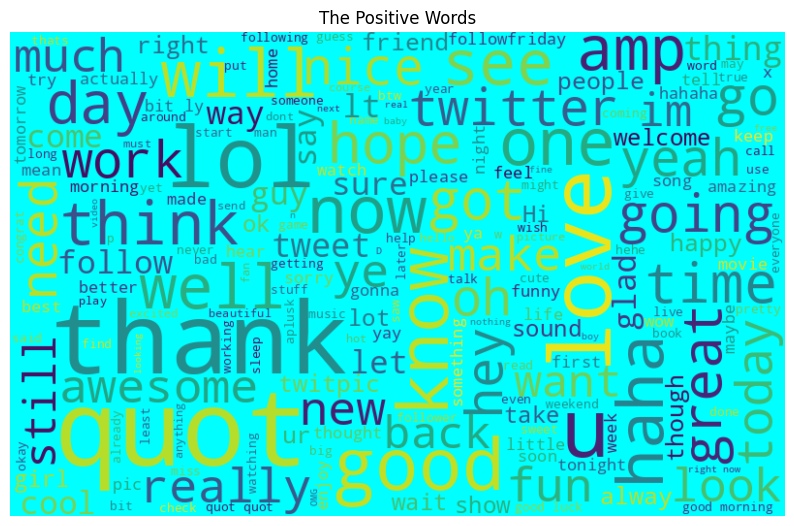

In [96]:
positive_words =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'cyan',width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()


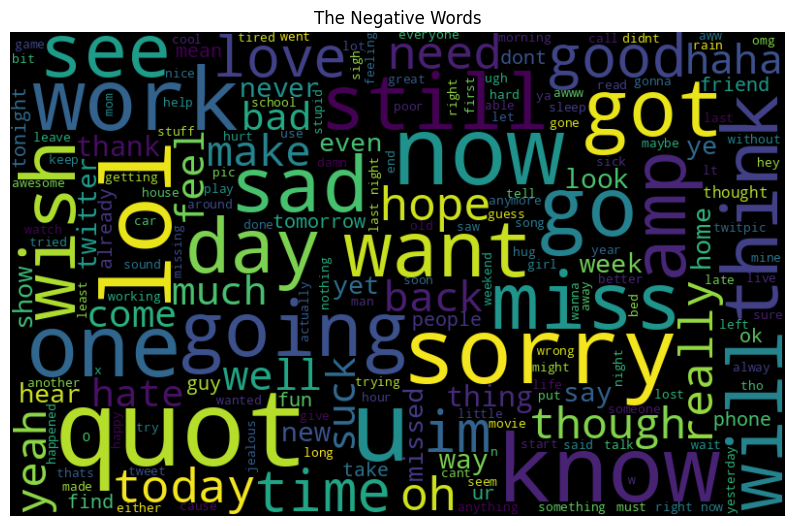

In [97]:
negative_words =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 0]])

wordcloud = WordCloud( width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [98]:
# removing unwanted patterns from the data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
# collecting the hashtags
def hashtag_extract(x):
    hashtags = []

    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [100]:
# extracting hashtags from positive tweets
HT_positive = hashtag_extract(df['SentimentText'][df['Sentiment'] == 1])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(df['SentimentText'][df['Sentiment'] == 0])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

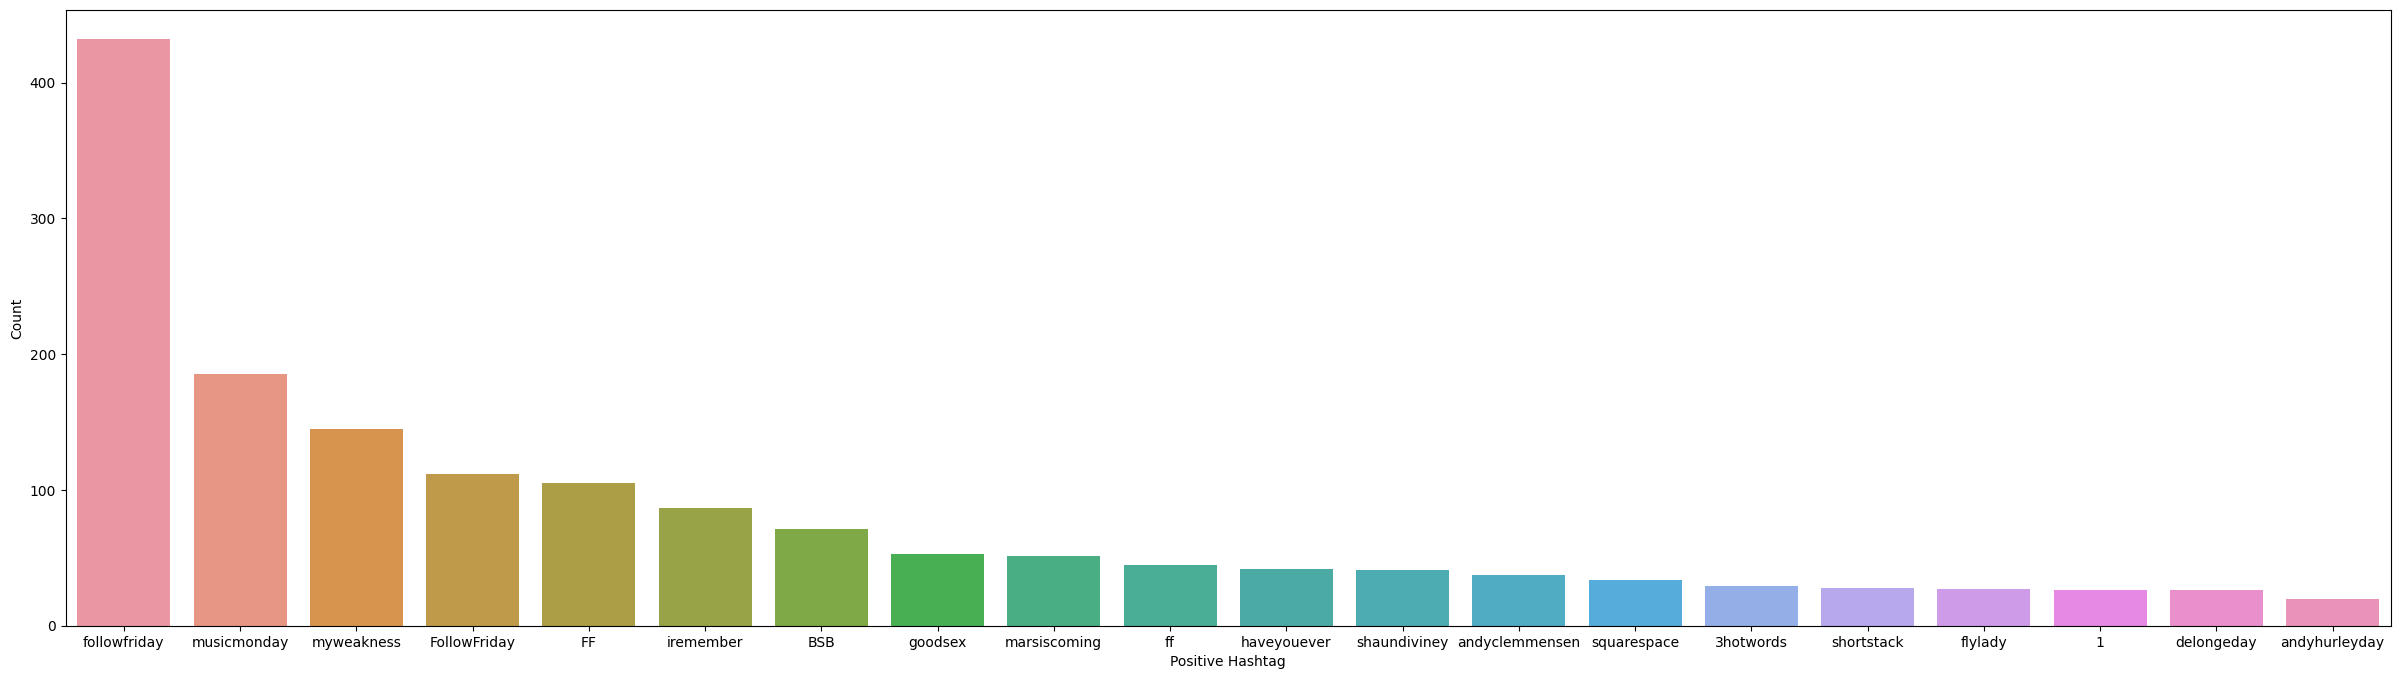

In [101]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Positive Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent positive hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(30,8))
ax = sns.barplot(data=d, x= "Positive Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

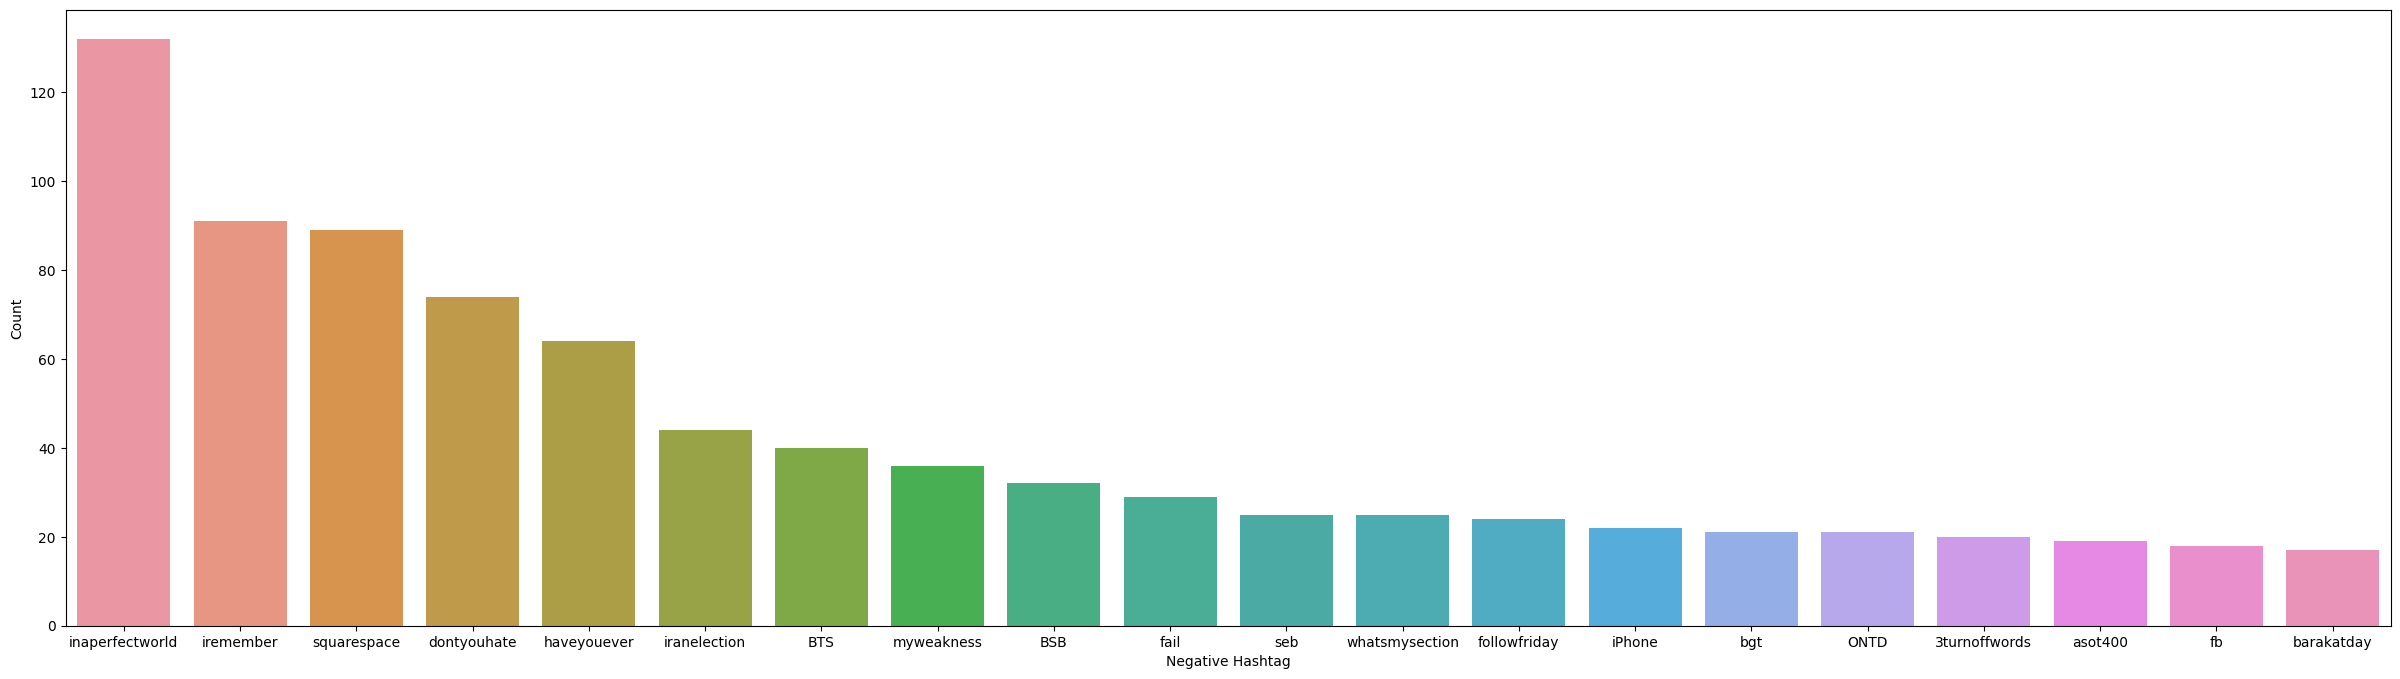

In [102]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Negative Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent negative hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(30,8))
ax = sns.barplot(data=d, x= "Negative Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()